<a href="https://colab.research.google.com/github/Hrishkesh/Invoice-/blob/master/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Hrishkesh/Invoice-.git

fatal: destination path 'Invoice-' already exists and is not an empty directory.


In [3]:
!ls Invoice-/

Data_visualization.ipynb  network.py		preprocessing_ter.py
example.png		  preprocessing_bis.py	README.md
Invoice_new.ipynb	  preprocessing.py


In [10]:
import os
from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
os.environ['GITHUB_USER'] = user
os.environ['GITHUB_PASSWORD'] = user

GitHub user··········
GitHub password··········


In [12]:
!git config --global user.email "hrishkesh.pattepu@gmail.com"
!git config --global user.name "Hrishkesh"

In [13]:
!cd Invoice- && git remote set-url origin https://$GITHUB_AUTH@github.com/$GITHUB_USER/Invoice-.git

In [14]:
!cd Invoice- && git pull

Already up to date.


In [15]:
!cd Invoice- && git add .

In [16]:
!cd Invoice- && git commit -m "training"

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [17]:
!cd Invoice- && git push

Everything up-to-date


In [18]:
!pip install colab_ssh --upgrade

In [19]:
from colab_ssh import launch_ssh, init_git
from getpass import getpass
ngrokToken = '1cfbiKCtHgohcxmNMIXe34CpbET_7GibpvfZdp55n7ordbjoT'
#password = getpass('Password of your choice')
password = 'root'
launch_ssh(ngrokToken,password)

Successfully running 2.tcp.ngrok.io:19459
[Optional] You can also connect with VSCode SSH Remote extension using this configuration:

	Host google_colab_ssh
		HostName 2.tcp.ngrok.io
		User root
		Port 19459
	  


In [20]:
!which python

/usr/local/bin/python


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!apt install tesseract-ocr -q
!pip install pytesseract -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [5]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pytesseract as te
import os
import re
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
!ls /content/drive

'My Drive'


In [7]:
# !unzip /content/drive/My\ Drive/invoice_eng/input/Data_Folder.zip -d /content/drive/My\ Drive/

In [8]:
!ls /content/drive/My\ Drive

'Colab Notebooks'   dir_boxes   dir_classes   dir_img   invoice_eng


In [9]:
## Hyperparameters
dir_img = "/content/drive/My Drive/dir_img"
dir_boxes = "/content/drive/My Drive/dir_boxes"
dir_classes = "/content/drive/My Drive/dir_classes"
outdir_np_chargrid = "/content/data/np_chargrids/"
outdir_png_chargrid = "/content/data/img_chargrids/"
outdir_np_gt = "/content/data/np_gt/"
outdir_png_gt = "/content/data/img_gt/"
outdir_pd_bbox = "/content/data/pd_bbox/"
tesseract_conf_threshold = 10
cosine_similarity_threshold = 0.4
list_classes = ["company", "date", "address", "total"]
nb_classes = len(list_classes)

In [10]:
# list_dir = [outdir_np_chargrid, outdir_png_chargrid, outdir_np_gt, outdir_png_gt, outdir_pd_bbox]
# for dir in list_dir:
#   if not os.path.exists(dir):
#       os.makedirs(dir)

In [11]:
list_filenames = [f for f in os.listdir(dir_img) if os.path.isfile(os.path.join(dir_img, f)) and os.path.isfile(os.path.join(dir_boxes, f).replace("jpg", "txt")) and os.path.isfile(os.path.join(dir_classes, f).replace("jpg", "txt"))]
len(list_filenames)

602

In [12]:
list_filenames.sort()

In [13]:
def extract_tesseract_information(filename):
    img = plt.imread(os.path.join(dir_img, filename), format='jpeg')
    print(filename, img.shape)
    
    dt = te.image_to_data(img, config="", output_type=te.Output.DATAFRAME, pandas_config=None)
    dt = dt[dt['conf']>tesseract_conf_threshold]
    dt["text"] = dt["text"].astype('str')
    
    return dt, img.shape

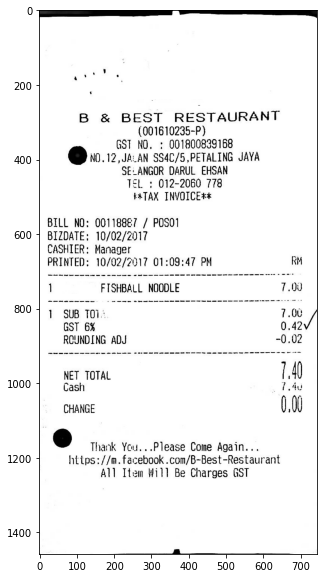

In [39]:
import random
index = random.randint(0,len(list_filenames))
filename = list_filenames[index]
# filename = 'X51006393376.jpg'
img = np.array(Image.open('/content/drive/My Drive/dir_img/' + filename), dtype=np.uint8)
#img = mpimg.imread('/content/drive/My Drive/dir_img/' + filename)
fig = plt.figure(figsize=(10,10))
plt.imshow(img)

# Extract tesseract dataframe (Bounding box for each word)

In [40]:
dt, img_shape = extract_tesseract_information(filename)
print(img_shape)

X51006328919.jpg (1458, 744, 3)
(1458, 744, 3)


In [41]:
dt

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,109,277,23,25,88,B
5,5,1,1,1,1,2,166,278,23,23,88,&
6,5,1,1,1,1,3,222,276,108,25,95,BEST
7,5,1,1,1,1,4,364,255,280,45,95,RESTAURANT
11,5,1,2,1,1,1,267,310,178,30,83,(001610235-P)
...,...,...,...,...,...,...,...,...,...,...,...,...
110,5,1,7,1,1,2,224,1228,53,24,95,Item
111,5,1,7,1,1,3,294,1227,51,25,81,Will
112,5,1,7,1,1,4,365,1228,26,24,96,Be
113,5,1,7,1,1,5,407,1227,98,28,95,Charges


# Bounding box to each letter from output of tesseract : chargrid_pd

In [42]:
def get_chargrid(dt):
    chargrid_pd = pd.DataFrame(columns = ['left', 'top', 'width', 'height', 'ord', 'conf'])

    for index, row in dt.iterrows():
        for i in range(0, len(row["text"])):
            row['width'] = (row['width']+len(row["text"])-1)//len(row["text"])*len(row["text"]) # Split character by character
        
            chargrid_pd = chargrid_pd.append({
            'left':row['left']+row['width']*i//len(row["text"]),
            'top':row['top'],
            'width':row['width']//len(row["text"]),
            'height':row['height'],
            'ord':ord(row["text"][i]),
            'conf':row["conf"]
            }, ignore_index = True)

    chargrid_pd = chargrid_pd[chargrid_pd['ord']>=33]
    chargrid_pd = chargrid_pd[chargrid_pd['ord']<=126]
    chargrid_pd['ord'] -= 32
    
    return chargrid_pd

In [43]:
chargrid_pd = get_chargrid(dt)

In [44]:
chargrid_pd

,left,top,width,height,ord,conf
0,109,277,23,25,34,88
1,166,278,23,23,6,88
2,222,276,27,25,34,95
3,249,276,27,25,37,95
4,276,276,27,25,51,95
...,...,...,...,...,...,...
348,477,1227,14,28,69,95
349,491,1227,14,28,83,95
350,521,1228,14,24,39,95
351,535,1228,14,24,51,95


# Draw bounding boxes on group of words using dir_boxes ground truth txt files

In [45]:
def add_row_gt_pd(row, c, gt_pd):
    return gt_pd.append({
            'left':row['top_left_x'],
            'top':row['top_left_y'],
            'right':row['bot_right_x'],
            'bot':row['bot_right_y'],
            'class':c
            }, ignore_index = True)

In [46]:
def extract_class_bounding_boxes(filename):
    gt_pd = pd.DataFrame(columns = ['left', 'top', 'right', 'bot', 'class'])
    
    ## Import ground truth files
    pd_boxes = pd.DataFrame(columns=['top_left_x', 'top_left_y', 'top_right_x', 'top_right_y', 'bot_left_x', 'bot_left_y', 'bot_right_x', 'bot_right_y', 'text'])
    dic_class = dict()
    
    with open(os.path.join(dir_boxes, filename).replace("jpg", "txt")) as f:
        reader = f.read().splitlines()
        pd_boxes = pd.DataFrame([x.split(",", 8) for x in reader], columns=['top_left_x', 'top_left_y', 'top_right_x', 'top_right_y', 'bot_right_x', 'bot_right_y', 'bot_left_x', 'bot_left_y', 'text'])
    
        pd_boxes["top_left_x"] = pd_boxes["top_left_x"].astype('int')
        pd_boxes["top_left_y"] = pd_boxes["top_left_y"].astype('int')
        pd_boxes["top_right_x"] = pd_boxes["top_right_x"].astype('int')
        pd_boxes["top_right_y"] = pd_boxes["top_right_y"].astype('int')
        pd_boxes["bot_left_x"] = pd_boxes["bot_left_x"].astype('int')
        pd_boxes["bot_left_y"] = pd_boxes["bot_left_y"].astype('int')
        pd_boxes["bot_right_x"] = pd_boxes["bot_right_x"].astype('int')
        pd_boxes["bot_right_y"] = pd_boxes["bot_right_y"].astype('int')
        pd_boxes["text"] = pd_boxes["text"].str.upper()

        fig,ax = plt.subplots(1, figsize=(10,10))
        ax.imshow(img)
        for i in range(len(pd_boxes)):
          rect = patches.Rectangle((pd_boxes['bot_left_x'][i],pd_boxes['bot_left_y'][i]),
                             (pd_boxes['top_right_x'][i]-pd_boxes['top_left_x'][i]),
                             (pd_boxes['top_left_y'][i]-pd_boxes['bot_left_y'][i]),
                             linewidth=1,edgecolor='r',facecolor='none')
          ax.add_patch(rect)
        plt.show()
  
        
    
    with open(os.path.join(dir_classes, filename).replace("jpg", "txt")) as f:
        dic_class = json.load(f)
    for i in range(nb_classes):
        if list_classes[i] not in dic_class.keys():
            dic_class[list_classes[i]] = "UNKNOWN"
        dic_class[list_classes[i]] = dic_class[list_classes[i]].upper()
    
    ## Detect classes in the bounding box file
    vectorized_text = CountVectorizer().fit_transform([dic_class[list_classes[i]] for i in range(nb_classes)]+pd_boxes["text"].tolist())
    
    for index, row in pd_boxes.iterrows():
        #Classes of type string
        if cosine_similarity(vectorized_text[0].reshape(1, -1), vectorized_text[index+nb_classes].reshape(1, -1))[0][0] > cosine_similarity_threshold:
            gt_pd = add_row_gt_pd(row, 3, gt_pd)
        
        if cosine_similarity(vectorized_text[2].reshape(1, -1), vectorized_text[index+nb_classes].reshape(1, -1))[0][0] > cosine_similarity_threshold:
            gt_pd = add_row_gt_pd(row, 2, gt_pd)
        
        #Classes of type date
        tab_date = re.findall(r'((?i)(?:[12][0-9]|3[01]|0*[1-9])(?P<sep>[- \/.\\])(?P=sep)*(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P=sep)+(?:19|20)\d\d|(?:[12][0-9]|3[01]|0*[1-9])(?P<sep2>[- \/.\\])(?P=sep2)*(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P=sep2)+\d\d|(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P<sep3>[- \/.\\])(?P=sep3)*(?:[12][0-9]|3[01]|0*[1-9])(?P=sep3)+(?:19|20)\d\d|(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P<sep4>[- \/.\\])(?P=sep4)*(?:[12][0-9]|3[01]|0*[1-9])(?P=sep4)+\d\d|(?:19|20)\d\d(?P<sep5>[- \/.\\])(?P=sep5)*(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P=sep5)+(?:[12][0-9]|3[01]|0*[1-9])|\d\d(?P<sep6>[- \/.\\])(?P=sep6)*(?:1[012]|0*[1-9]|jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?P=sep6)+(?:[12][0-9]|3[01]|0*[1-9])|(?:[12][0-9]|3[01]|0*[1-9])(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?:19|20)\d\d|(?:[12][0-9]|3[01]|0*[1-9])(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\d\d|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?:[12][0-9]|3[01]|0*[1-9])(?:19|20)\d\d|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?:[12][0-9]|3[01]|0*[1-9])\d\d|(?:19|20)\d\d(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?:[12][0-9]|3[01]|0*[1-9])|\d\d(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)(?:[12][0-9]|3[01]|0*[1-9])|(?:[12][0-9]|3[01]|0[1-9])(?:1[012]|0[1-9])(?:19|20)\d\d|(?:1[012]|0[1-9])(?:[12][0-9]|3[01]|0[1-9])(?:19|20)\d\d|(?:19|20)\d\d(?:1[012]|0[1-9])(?:[12][0-9]|3[01]|0[1-9])|(?:1[012]|0[1-9])(?:[12][0-9]|3[01]|0[1-9])\d\d|(?:[12][0-9]|3[01]|0[1-9])(?:1[012]|0[1-9])\d\d|\d\d(?:1[012]|0[1-9])(?:[12][0-9]|3[01]|0[1-9]))', row["text"])
        for dat in tab_date:
            if dat[0] == dic_class["date"]:
                gt_pd = add_row_gt_pd(row, 4, gt_pd)
        
        #Classes of type float
        tab_floats = re.findall(r'([-+]?[0-9]*\.?[0-9]+)', row["text"])
        total_float = re.search(r'([-+]?[0-9]*\.?[0-9]+)', dic_class["total"])
        if total_float:
            for flo in tab_floats:
                if float(total_float.group(0)) == float(flo):
                    gt_pd = add_row_gt_pd(row, 1, gt_pd)
    
    return gt_pd

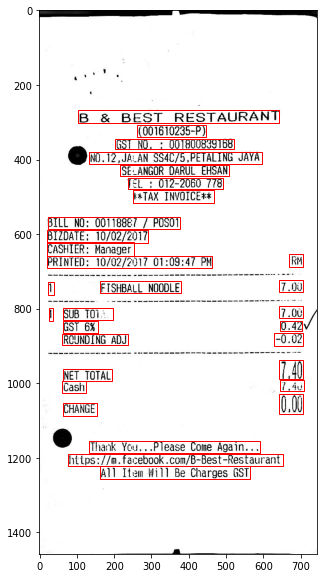

In [47]:
gt_pd = extract_class_bounding_boxes(filename)

In [48]:
gt_pd

,left,top,right,bot,class
0,104,268,643,302,3
1,133,380,597,412,2
2,216,414,507,443,2
3,20,588,291,623,4
4,20,658,463,691,4
5,642,938,706,990,1
6,646,991,708,1022,1
7,76,1190,653,1221,3


# Draw bounding boxes based on classes

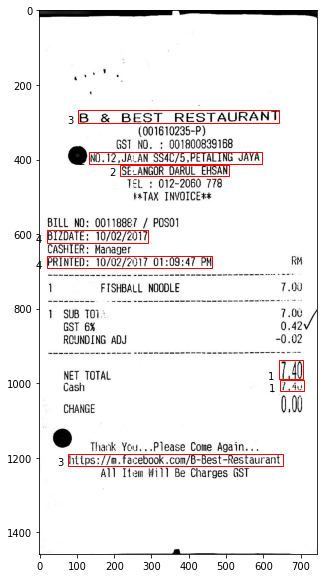

In [49]:
fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(img)
for i in range(len(gt_pd)):
  rect1 = patches.Rectangle((gt_pd['left'][i],gt_pd['top'][i]),
                            (gt_pd['right'][i]-gt_pd['left'][i]),
                            (gt_pd['bot'][i]-gt_pd['top'][i]),
                            linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect1)
  ax.text(gt_pd['left'][i]-30,gt_pd['bot'][i],gt_pd['class'][i])  
plt.show()

In [50]:
chargrid_pd.head()

,left,top,width,height,ord,conf
0,109,277,23,25,34,88
1,166,278,23,23,6,88
2,222,276,27,25,34,95
3,249,276,27,25,37,95
4,276,276,27,25,51,95


In [51]:
gt_pd.head()

,left,top,right,bot,class
0,104,268,643,302,3
1,133,380,597,412,2
2,216,414,507,443,2
3,20,588,291,623,4
4,20,658,463,691,4


In [52]:
img_shape

(1458, 744, 3)

In [53]:
np.array([0]*img_shape[0]*img_shape[1]).reshape((img_shape[0], img_shape[1])).shape

(1458, 744)

# Replace each pixel in input image by ASCII value --> chargrid_np
# Replace each pixel in output image by class number --> gt_np

In [54]:
def get_reduced_output(chargrid_pd, gt_pd, img_shape):

    # Add plots
    fig, ax = plt.subplots(1, 4, figsize=(15, 15))
    ax[0].imshow(img)
    ax[1].imshow(img)
    for i in range(len(gt_pd)):
      rect1 = patches.Rectangle((gt_pd['left'][i],gt_pd['top'][i]),
                          (gt_pd['right'][i]-gt_pd['left'][i]),
                          (gt_pd['bot'][i]-gt_pd['top'][i]),
                          linewidth=1,edgecolor='r',facecolor='none')
      ax[1].add_patch(rect1)
      ax[1].text(gt_pd['left'][i]-30,gt_pd['bot'][i],gt_pd['class'][i])  

    chargrid_np = np.array([0]*img_shape[0]*img_shape[1]).reshape((img_shape[0], img_shape[1]))
    
    chargrid_pd.sort_values(by="conf", ascending=True, inplace=True) #Sort by confidence
    chargrid_pd.reset_index(drop=True, inplace=True)
    
    for index, row in chargrid_pd.iterrows():
        chargrid_np[row['top']:row['top']+row['height'], row['left']:row['left']+row['width']] = row['ord']
    
    gt_np = np.array([0]*img_shape[0]*img_shape[1]).reshape((img_shape[0], img_shape[1]))
    
    gt_pd.sort_values(by="class", ascending=True, inplace=True) #Sort by confidence
    gt_pd.reset_index(drop=True, inplace=True)
    
    for index, row in gt_pd.iterrows():
        gt_np[row['top']:row['bot'], row['left']:row['right']] = row['class']
 
    ax[2].imshow(chargrid_np)
    ax[3].imshow(gt_np)
    
    ## Remove empty rows and columns
    tab_cumsum_todelete_x = np.cumsum(np.all(chargrid_np == 0, axis=0))
    gt_pd['left'] -= tab_cumsum_todelete_x[gt_pd['left'].tolist()]
    gt_pd['right'] -= tab_cumsum_todelete_x[gt_pd['right'].tolist()]
    
    tab_cumsum_todelete_y = np.cumsum(np.all(chargrid_np == 0, axis=1))
    gt_pd['top'] -= tab_cumsum_todelete_y[gt_pd['top'].tolist()]
    gt_pd['bot'] -= tab_cumsum_todelete_y[gt_pd['bot'].tolist()]
    
    gt_np = gt_np[:,~np.all(chargrid_np == 0, axis=0)]
    gt_np = gt_np[~np.all(chargrid_np == 0, axis=1),:]

    img_cropped = img[:,~np.all(chargrid_np == 0, axis=0)]
    img_cropped = img_cropped[~np.all(chargrid_np == 0, axis=1), :]
    print(img_shape)
    print(img_cropped.shape)
    
    chargrid_np = chargrid_np[:,~np.all(chargrid_np == 0, axis=0)]
    chargrid_np = chargrid_np[~np.all(chargrid_np == 0, axis=1),:]


    fig, ax = plt.subplots(1, 4, figsize=(15, 15))

    ax[0].imshow(img_cropped)

    ax[1].imshow(chargrid_np)
    ax[2].imshow(gt_np)

    ax[3].imshow(img_cropped, cmap='gray', alpha=0.5)
    ax[3].imshow(gt_np, cmap='jet', alpha=0.5)
    
    return chargrid_np, gt_np, gt_pd, img_cropped

(1458, 744, 3)
(683, 682, 3)


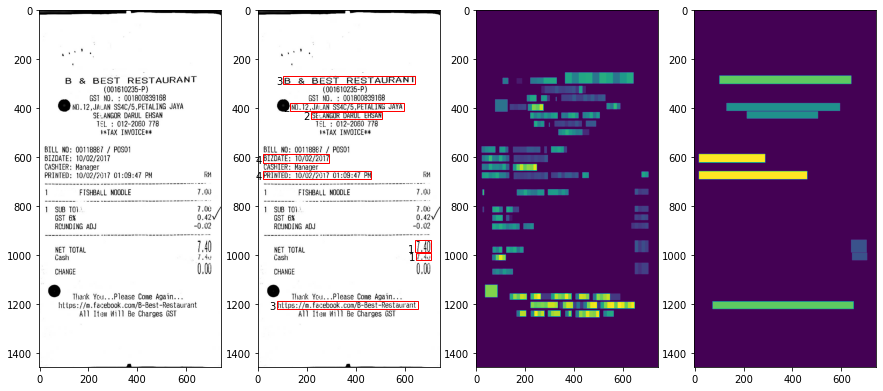

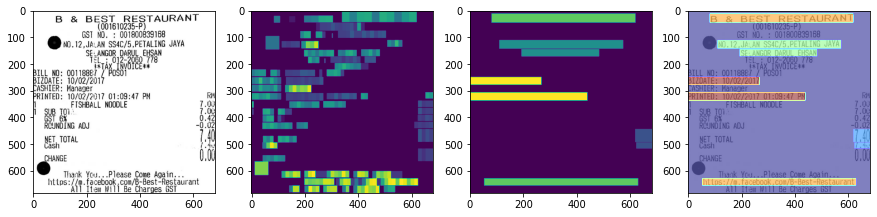

In [55]:
chargrid_np, gt_np, gt_pd, img_cropped = get_reduced_output(chargrid_pd, gt_pd, img_shape)

In [56]:
max_padding = 3
equal_threshold = 0.95

In [57]:
def get_reduce(img, axis):
    reduce_f = 1
    
    trust = 1.0
    reduce = 1
    while reduce <= img.shape[axis]/2:
        reduce += 1
        if img.shape[axis]%reduce == 0:
            if axis == 0:
                img_reshaped = img.reshape(img.shape[0]//reduce, -1, img.shape[1])
                img2 = np.repeat(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=img_reshaped), reduce, axis=axis)
            else:
                img_reshaped = img.reshape(img.shape[0], img.shape[1]//reduce, -1)
                img2 = np.repeat(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=2, arr=img_reshaped), reduce, axis=axis)
                
            trust = np.sum(img == img2)/(np.shape(img)[0]*np.shape(img)[1])
            if trust > equal_threshold:
                reduce_f = reduce

    return reduce_f

In [58]:
def get_max_reduce(img, axis):
    reduce_f = get_reduce(img, axis)
    padding_left = 0
    padding_right = 0

    for i in range(0, max_padding):
        img = np.insert(img, 0, 0, axis=axis)
        reduce_f_ = get_reduce(img, axis)
        if reduce_f_ > reduce_f:
            reduce_f = reduce_f_
            padding_left = i+1
            padding_right = i
            
        img = np.insert(img, 0, img.shape[axis], axis=axis)
        reduce_f_ = get_reduce(img, axis)
        if reduce_f_ > reduce_f:
            reduce_f = reduce_f_
            padding_left = i+1
            padding_right = i+1
    
    return reduce_f, padding_left, padding_right

In [59]:
def get_img_reduced(img, reduce_x, reduce_y, padding_left, padding_right, padding_top, padding_bot):
    img2 = img
    for i in range(0, padding_top):
        img2 = np.insert(img2, 0, 0, axis=0)
    for i in range(0, padding_bot):
        img2 = np.insert(img2, 0, img2.shape[0], axis=0)
    for i in range(0, padding_left):
        img2 = np.insert(img2, 0, 0, axis=1)
    for i in range(0, padding_right):
        img2 = np.insert(img2, 0, img2.shape[1], axis=1)
    
    img2_reshaped = img2.reshape(img2.shape[0]//reduce_y, -1, img2.shape[1])
    img2 = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=img2_reshaped)
    
    img2_reshaped = img2.reshape(img2.shape[0], img2.shape[1]//reduce_x, -1)
    img2 = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=2, arr=img2_reshaped)
    
    return img2

In [60]:
reduce_y, padding_top, padding_bot = get_max_reduce(chargrid_np, 0)

In [61]:
reduce_x, padding_left, padding_right = get_max_reduce(chargrid_np, 1)

In [62]:
chargrid_np2 = get_img_reduced(chargrid_np, reduce_x, reduce_y, padding_left, padding_right, padding_top, padding_bot)
gt_np2 = get_img_reduced(gt_np, reduce_x, reduce_y, padding_left, padding_right, padding_top, padding_bot)

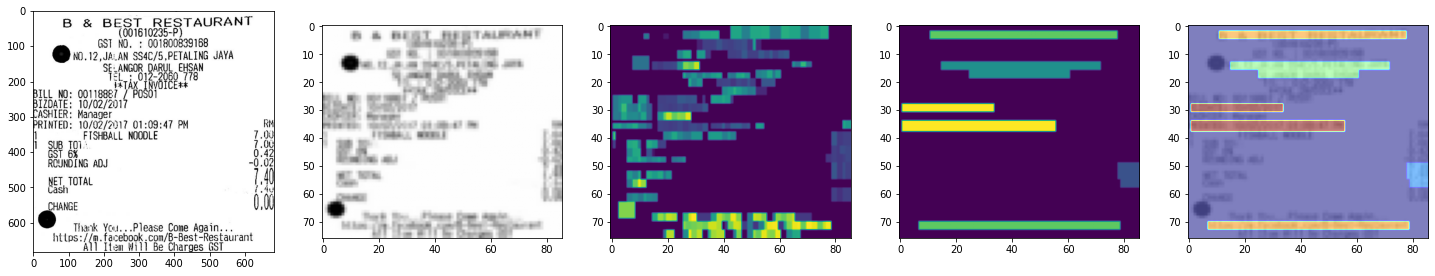

In [63]:
from skimage.transform import resize
img_cropped_resized = resize(img_cropped, (chargrid_np2.shape[0], chargrid_np2.shape[1],img_cropped.shape[2]))
fig, ax = plt.subplots(1, 5, figsize=(25, 25))
ax[0].imshow(img_cropped)
ax[1].imshow(img_cropped_resized)
ax[2].imshow(chargrid_np2)
ax[3].imshow(gt_np2)
ax[4].imshow(img_cropped_resized, cmap='gray', alpha=0.5)
ax[4].imshow(gt_np2, cmap='jet', alpha=0.5)

In [64]:
def reduce_pd_bbox(pd_bbox, padding_left, padding_top, reduce_x, reduce_y):
    pd_bbox['left'] += padding_left
    pd_bbox['right'] += padding_left
    pd_bbox['top'] += padding_top
    pd_bbox['bot'] += padding_top
    
    pd_bbox['left'] = pd_bbox['left'].astype(float)
    pd_bbox['right'] = pd_bbox['right'].astype(float)
    pd_bbox['top'] = pd_bbox['top'].astype(float)
    pd_bbox['bot'] = pd_bbox['bot'].astype(float)

    pd_bbox['left'] = round(pd_bbox['left']/reduce_x)
    pd_bbox['right'] = round(pd_bbox['right']/reduce_x)
    pd_bbox['top'] = round(pd_bbox['top']/reduce_y)
    pd_bbox['bot'] = round(pd_bbox['bot']/reduce_y)
    
    pd_bbox['left'] = pd_bbox['left'].astype(int)
    pd_bbox['right'] = pd_bbox['right'].astype(int)
    pd_bbox['top'] = pd_bbox['top'].astype(int)
    pd_bbox['bot'] = pd_bbox['bot'].astype(int)
    
    return pd_bbox

In [65]:
gt_pd = reduce_pd_bbox(gt_pd, padding_left, padding_top, reduce_x, reduce_y)

In [66]:
!wget https://www.dropbox.com/s/fhuj84wmi40gd6r/preprocessing_3_input.zip

--2020-07-05 18:24:29--  https://www.dropbox.com/s/fhuj84wmi40gd6r/preprocessing_3_input.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fhuj84wmi40gd6r/preprocessing_3_input.zip [following]
--2020-07-05 18:24:29--  https://www.dropbox.com/s/raw/fhuj84wmi40gd6r/preprocessing_3_input.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e646857434336aad7991d318e.dl.dropboxusercontent.com/cd/0/inline/A6_dTroxa3ntaLCiDMT1g0u0NRvqTLA4cOqgUWmiSjhQyGwtFjQ5LHlAsDbrCKOl8vQR5nYrLbSD54CpDp2JhUn21Nid87IUr-PzjYTg3gPewS6oHYcGIrSE_qqEetGJ8NU/file# [following]
--2020-07-05 18:24:29--  https://uc5e646857434336aad7991d318e.dl.dropboxusercontent.com/cd/0/inline/A6_dTroxa3ntaLCiDMT1g0u0NRvqTLA4cOqgUWmiSjhQyGwtFjQ5LHlAsDbrCKOl8vQR5nYrLbS

In [67]:
#!unzip preprocessing_3_input.zip -d /content/data/

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.transform import resize

In [69]:
dir_np_chargrid_reduced = "/content/data/outdir_np_chargrid_reduced"
dir_np_gt_reduced = "/content/data/outdir_np_gt_reduced"
dir_pd_bbox_reduced = "/content/data/outdir_pd_bbox_reduced"
outdir_np_chargrid_1h = "/content/data/outdir_np_chargrid_1h"
outdir_np_gt_1h = "/content/data/outdir_np_gt_1h"
outdir_np_bbox_anchor_mask = "/content/data/outdir_np_bbox_anchor_mask"
outdir_np_bbox_anchor_coord = "/content/data/outdir_np_bbox_anchor_coord"
target_height = 256
target_width = 128
target_digit = 61
target_class = 5
nb_anchors = 4 # one per foreground class
nb_digit_threshold = 10000

In [70]:
list_filenames2 = [f for f in os.listdir(dir_np_chargrid_reduced) if os.path.isfile(os.path.join(dir_np_chargrid_reduced, f))]

In [71]:
#list(set(list_filenames) - set([x.replace('npy', 'jpg') for x in list_filenames2]))

In [72]:
!ls

data	  ngrok-stable-linux-amd64.zip	preprocessing_3_input.zip.3
drive	  preprocessing_3_input.zip	preprocessing_3_input.zip.4
Invoice-  preprocessing_3_input.zip.1	sample_data
ngrok	  preprocessing_3_input.zip.2


In [73]:
list_filenames2.sort()

In [74]:
## Load inputs
tab_img = []
tab_gt = []
for i in range(0, len(list_filenames2)):
    tab_img.append(np.load(os.path.join(dir_np_chargrid_reduced, list_filenames2[i])))
    tab_gt.append(np.load(os.path.join(dir_np_gt_reduced, list_filenames2[i])))

In [75]:
print("tab_img shape=", np.shape(tab_img))
print("tab_gt shape=", np.shape(tab_gt))

tab_img shape= (602,)
tab_gt shape= (602,)


In [80]:
def print_stats_img(tab_img):
    fig, ax = plt.subplots(1, 4, figsize=(10, 10))
    fig.suptitle('Minumum width and maximum width images', fontsize=12)
    tab_width = [np.shape(tab_img[i])[0] for i in range(0, len(tab_img))]
    print("min width=", np.min(tab_width), list_filenames2[np.argmin(tab_width)])
    ax[0].imshow(np.array(Image.open('/content/drive/My Drive/dir_img/' + list_filenames2[np.argmin(tab_width)].replace('npy', 'jpg')), dtype=np.uint8))
    ax[1].imshow(np.load(dir_np_chargrid_reduced + '/' + list_filenames2[np.argmin(tab_width)]))
    print("max width=", np.max(tab_width), list_filenames2[np.argmax(tab_width)])
    ax[2].imshow(np.array(Image.open('/content/drive/My Drive/dir_img/' + list_filenames2[np.argmax(tab_width)].replace('npy', 'jpg')), dtype=np.uint8))
    ax[3].imshow(np.load(dir_np_chargrid_reduced + '/' + list_filenames2[np.argmax(tab_width)]))
    print("ave width=", np.average(tab_width))
    print("std width=", np.std(tab_width))

    tab_height = [np.shape(tab_img[i])[1] for i in range(0, len(tab_img))]
    fig, ax = plt.subplots(1, 4, figsize=(10, 10))
    fig.suptitle('Minumum height and maximum height images', fontsize=12)
    ax[0].imshow(np.array(Image.open('/content/drive/My Drive/dir_img/' + list_filenames2[np.argmin(tab_height)].replace('npy', 'jpg')), dtype=np.uint8))
    ax[1].imshow(np.load(dir_np_chargrid_reduced + '/' + list_filenames2[np.argmin(tab_height)]))
    print("min height=", np.min(tab_height))
    print("max height=", np.max(tab_height), list_filenames2[np.argmax(tab_height)])
    ax[2].imshow(np.array(Image.open('/content/drive/My Drive/dir_img/' + list_filenames2[np.argmax(tab_height)].replace('npy', 'jpg')), dtype=np.uint8))
    ax[3].imshow(np.load(dir_np_chargrid_reduced + '/' + list_filenames2[np.argmax(tab_height)]))
    print("ave height=", np.average(tab_height))
    print("std height=", np.std(tab_height))

def print_stats_seg(tab_gt):
    gt_stats = [np.unique(gt, return_counts=True) for gt in tab_gt]
    prop_nb_class = [0]*target_class
    prop_class = [0]*target_class #5 classes (other, total, address, company, date)
    for uniqu, count in gt_stats:
        prop_nb_class[len(uniqu)-1] += 1
        for i in range(0, len(uniqu)):
            prop_class[uniqu[i]] += count[i]
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].bar(np.arange(target_class), prop_nb_class, color = 'b', width = 0.25)
    ax[0].set_title('Number of images with atmost 4, 3, 2, 1 classes')
    print("prop_nb_class=", prop_nb_class, prop_nb_class/np.sum(prop_nb_class))
    ax[1].bar(np.arange(target_class), prop_class, color = 'g', width = 0.25)
    ax[1].set_title('Number of pixels per class')
    print("prop_class=", prop_class, prop_class/np.sum(prop_class))


min width= 42 X51006392299.npy
max width= 288 X51007846305.npy
ave width= 119.20265780730897
std width= 36.37309609013106
min height= 39
max height= 158 X51006913054.npy
ave height= 97.91528239202658
std height= 17.117566864252304


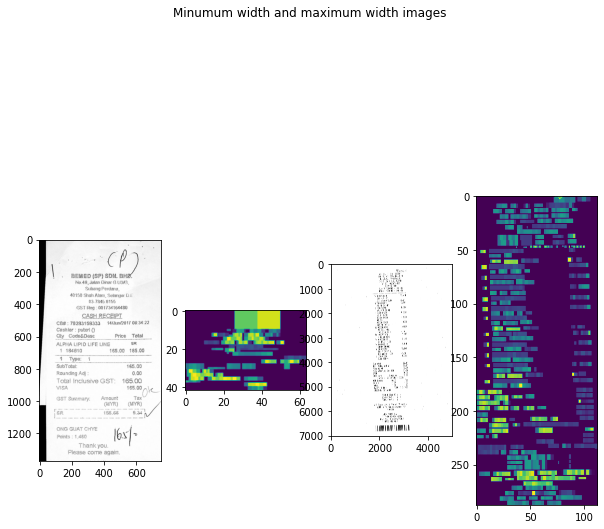

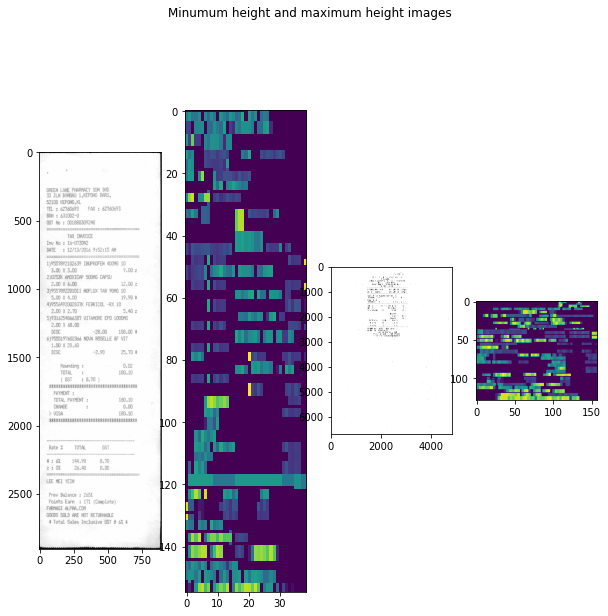

In [81]:
print_stats_img(tab_img)

prop_nb_class= [0, 1, 2, 27, 572] [0.         0.00166113 0.00332226 0.0448505  0.95016611]
prop_class= [6320167, 80610, 355841, 228031, 106190] [0.89131441 0.01136819 0.0501832  0.03215854 0.01497566]


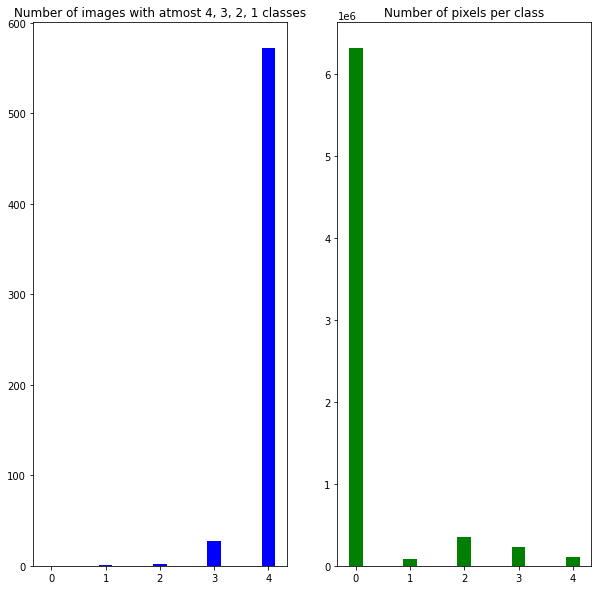

In [82]:
print_stats_seg(tab_gt)

In [83]:
def discard_digits_with_low_occurence(tab_img): #unique characters are 93 (ascii)
    nb_unique_digit, count_digit = np.unique(np.concatenate([img.flatten() for img in tab_img]), return_counts=True)
    mask_digit_to_keep = count_digit>nb_digit_threshold #count_digit to count the no of each character appearing in a image
    
    new_digit_nb = np.cumsum(mask_digit_to_keep) #the low occurence less than 10000 are 35
    new_digit_nb -= 1
    
    for i in range(1, len(new_digit_nb)):
        if new_digit_nb[len(new_digit_nb)-i] == new_digit_nb[len(new_digit_nb)-i-1]:
            new_digit_nb[len(new_digit_nb)-i] = target_digit-1
    
    for i in range(0, len(tab_img)):
        for j in range(0, len(nb_unique_digit)):
            tab_img[i][tab_img[i] == nb_unique_digit[j]] = new_digit_nb[j]
    
    return tab_img

In [84]:
tab_img = discard_digits_with_low_occurence(tab_img)

In [85]:
filename

'X51006328919.jpg'

In [86]:
i = index

In [87]:
i

233

In [88]:
list_filenames2[i]

'X51006328919.npy'

In [89]:
print(np.shape(tab_img[i]))
print(np.shape(tab_gt[i]))

(76, 86)
(76, 86)


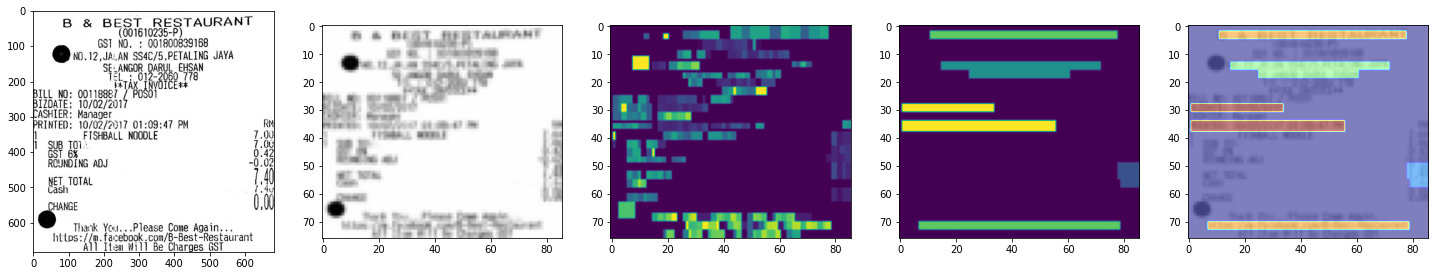

In [90]:
fig, ax = plt.subplots(1, 5, figsize=(25, 25))
ax[0].imshow(img_cropped)
ax[1].imshow(img_cropped_resized)
ax[2].imshow(tab_img[i])
ax[3].imshow(tab_gt[i])
ax[4].imshow(img_cropped_resized, cmap='gray', alpha=0.5)
ax[4].imshow(tab_gt[i], cmap='jet', alpha=0.5)

In [91]:
def convert_to_1h(img, gt):
    img_1h = np.eye(target_digit)[img]
    gt_1h = np.eye(target_class)[gt]

    return img_1h, gt_1h

In [92]:
img_1h, gt_1h = convert_to_1h(tab_img[i], tab_gt[i])

In [93]:
print(np.shape(img_1h))
print(np.shape(gt_1h))

(76, 86, 61)
(76, 86, 5)


In [94]:
def resize_to_target(img_1h, gt_1h): #(256,128,61) (256,128,5)
    img_1h = resize(img_1h, (target_height, target_width, target_digit), order=1, anti_aliasing=True)
    gt_1h = resize(gt_1h, (target_height, target_width, target_class), order=1, anti_aliasing=True)
    
    return img_1h, gt_1h

In [95]:
img_1h, gt_1h = resize_to_target(img_1h, gt_1h)

In [96]:
input_image_final = resize(img_cropped_resized, (target_height, target_width, img_cropped_resized.shape[2]))

In [98]:
pd_bbox = pd.read_pickle(os.path.join(dir_pd_bbox_reduced, list_filenames2[i]).replace("npy", "pkl"))

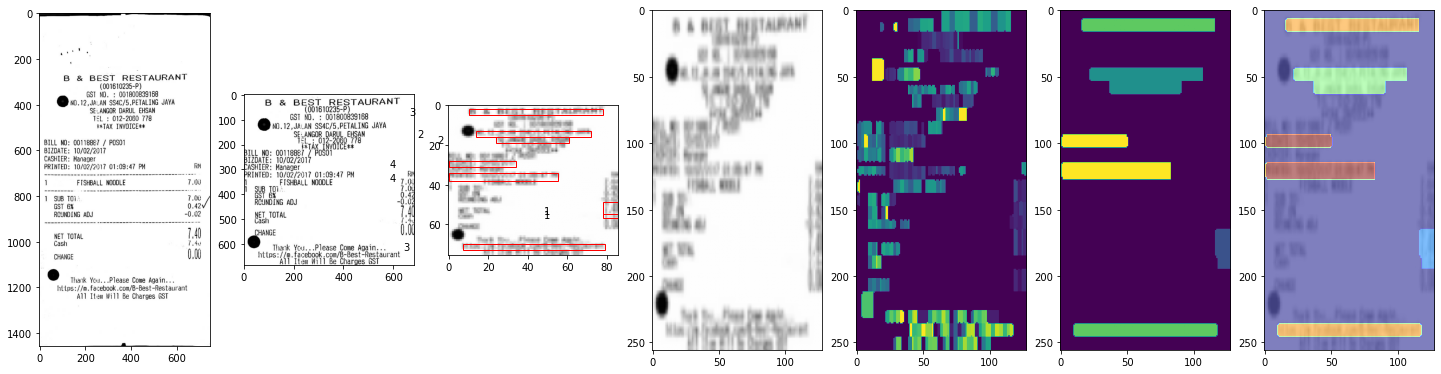

In [99]:
fig, ax = plt.subplots(1, 7, figsize=(25, 25)) 
ax[0].imshow(img)
ax[1].imshow(img_cropped)
ax[2].imshow(img_cropped_resized)
for i in range(len(pd_bbox)):
  rect1 = patches.Rectangle((pd_bbox['left'][i],pd_bbox['top'][i]),
                      (pd_bbox['right'][i]-pd_bbox['left'][i]),
                      (pd_bbox['bot'][i]-pd_bbox['top'][i]),
                      linewidth=1,edgecolor='r',facecolor='none')
  ax[2].add_patch(rect1)
  ax[2].text(gt_pd['left'][i]-30,gt_pd['bot'][i],gt_pd['class'][i]) 
ax[3].imshow(input_image_final)
ax[4].imshow(np.apply_along_axis(np.argmax, axis=2, arr=img_1h))
ax[5].imshow(np.apply_along_axis(np.argmax, axis=2, arr=gt_1h))
ax[6].imshow(input_image_final, cmap='gray', alpha=0.5)
ax[6].imshow(np.apply_along_axis(np.argmax, axis=2, arr=gt_1h), cmap='jet', alpha=0.5)

In [100]:
pd_bbox

,left,top,right,bot,class
0,78,49,86,55,1
1,78,55,86,57,1
2,14,13,72,16,2
3,24,16,61,19,2
4,10,2,78,5,3
5,7,70,79,73,3
6,0,28,34,31,4
7,0,34,55,38,4


In [101]:
def extract_anchor_mask(pd_bbox, img_shape):
    np_bbox_anchor_mask = np.ones((img_shape[0], img_shape[1], 2*nb_anchors))
    for index, row in pd_bbox.iterrows():
        if row["class"] > 0:
            np_bbox_anchor_mask[row["top"]:row["bot"], row["left"]:row["right"], 2*(row["class"]-1)+1] = 0
    for j in range(0, nb_anchors):
        np_bbox_anchor_mask[:, :, 2*j+0] = 1-np_bbox_anchor_mask[:, :, 2*j+1]
    
    np_bbox_anchor_mask = resize(np_bbox_anchor_mask, (target_height, target_width, 2*nb_anchors), order=1, anti_aliasing=True)
    
    return np_bbox_anchor_mask #(256,128,8) 2xnb_anchors(foreground versus background)

In [102]:
np_bbox_anchor_mask = extract_anchor_mask(pd_bbox, np.shape(tab_img[i]))

In [103]:
def extract_anchor_coordinates(pd_bbox, img_shape):
    pd_bbox['left'] /= img_shape[1]
    pd_bbox['right'] /= img_shape[1]
    pd_bbox['top'] /= img_shape[0]
    pd_bbox['bot'] /= img_shape[0]
    
    pd_bbox['np_left'] = round(pd_bbox['left']*target_width)
    pd_bbox['np_right'] = round(pd_bbox['right']*target_width)
    pd_bbox['np_top'] = round(pd_bbox['top']*target_height)
    pd_bbox['np_bot'] = round(pd_bbox['bot']*target_height)
    
    pd_bbox['np_left'] = pd_bbox['np_left'].astype(int)
    pd_bbox['np_right'] = pd_bbox['np_right'].astype(int)
    pd_bbox['np_top'] = pd_bbox['np_top'].astype(int)
    pd_bbox['np_bot'] = pd_bbox['np_bot'].astype(int)

    np_bbox_anchor_coord = np.zeros((target_height, target_width, 4*nb_anchors))
    for index, row in pd_bbox.iterrows():
        if row["class"] > 0:
            np_bbox_anchor_coord[row["np_top"]:row["np_bot"], row["np_left"]:row["np_right"], 4*(row["class"]-1)] = row["left"]
            np_bbox_anchor_coord[row["np_top"]:row["np_bot"], row["np_left"]:row["np_right"], 4*(row["class"]-1)+1] = row["top"]
            np_bbox_anchor_coord[row["np_top"]:row["np_bot"], row["np_left"]:row["np_right"], 4*(row["class"]-1)+2] = row["right"]
            np_bbox_anchor_coord[row["np_top"]:row["np_bot"], row["np_left"]:row["np_right"], 4*(row["class"]-1)+3] = row["bot"]
    
    return np_bbox_anchor_coord #(256,128,16) 4Xnb_anchors(box coordinates)

In [104]:
np_bbox_anchor_coord = extract_anchor_coordinates(pd_bbox, np.shape(tab_img[i]))

In [112]:
pd_bbox

,left,top,right,bot,class,np_left,np_right,np_top,np_bot
0,0.728972,0.859649,0.803738,0.964912,1,93,103,220,247
1,0.728972,0.964912,0.803738,1.000000,1,93,103,247,256
2,0.130841,0.228070,0.672897,0.280702,2,17,86,58,72
3,0.224299,0.280702,0.570093,0.333333,2,29,73,72,85
4,0.093458,0.035088,0.728972,0.087719,3,12,93,9,22
5,0.065421,1.228070,0.738318,1.280702,3,8,95,314,328
6,0.000000,0.491228,0.317757,0.543860,4,0,41,126,139
7,0.000000,0.596491,0.514019,0.666667,4,0,66,153,171


In [115]:
np_bbox_anchor_coord.shape

(256, 128, 16)

In [116]:
np_bbox_anchor_coord[153][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.59649123, 0.51401869,
       0.66666667])

In [105]:
def plot_anchor(gt_1h, np_bbox_anchor_mask, np_bbox_anchor_coord):    
    fig, ax  = plt.subplots(3, 8,figsize=(25, 25))
    for i in range(0, 8):
      ax[0][i].imshow(input_image_final, cmap='gray')
    for i in range(0, 8):
      ax[1][i].imshow(np.apply_along_axis(np.argmax, axis=2, arr=gt_1h), cmap='gray')
    for i in range(0, 8):
      ax[2][i].imshow(np_bbox_anchor_mask[:, :, i], cmap='gray')
    plt.show()

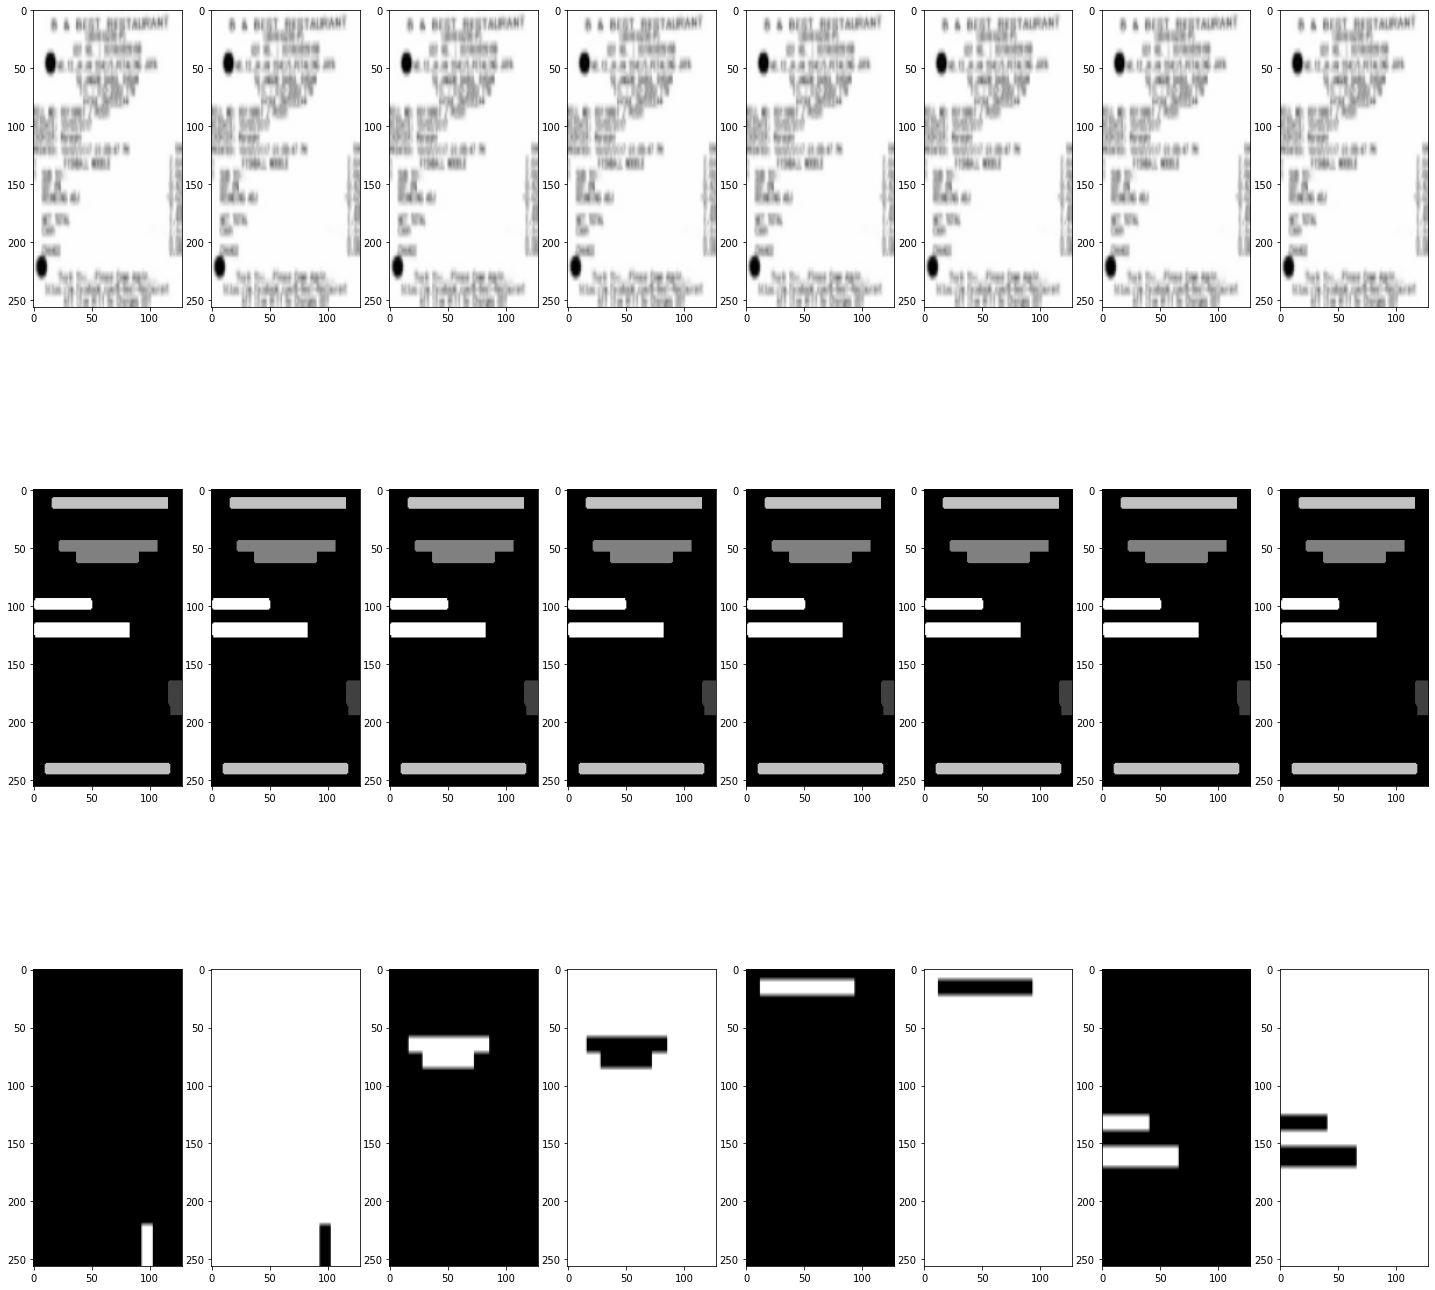

In [106]:
plot_anchor(gt_1h, np_bbox_anchor_mask, np_bbox_anchor_coord)

In [119]:
pd_bbox

,left,top,right,bot,class,np_left,np_right,np_top,np_bot
0,0.728972,0.859649,0.803738,0.964912,1,93,103,220,247
1,0.728972,0.964912,0.803738,1.000000,1,93,103,247,256
2,0.130841,0.228070,0.672897,0.280702,2,17,86,58,72
3,0.224299,0.280702,0.570093,0.333333,2,29,73,72,85
4,0.093458,0.035088,0.728972,0.087719,3,12,93,9,22
5,0.065421,1.228070,0.738318,1.280702,3,8,95,314,328
6,0.000000,0.491228,0.317757,0.543860,4,0,41,126,139
7,0.000000,0.596491,0.514019,0.666667,4,0,66,153,171


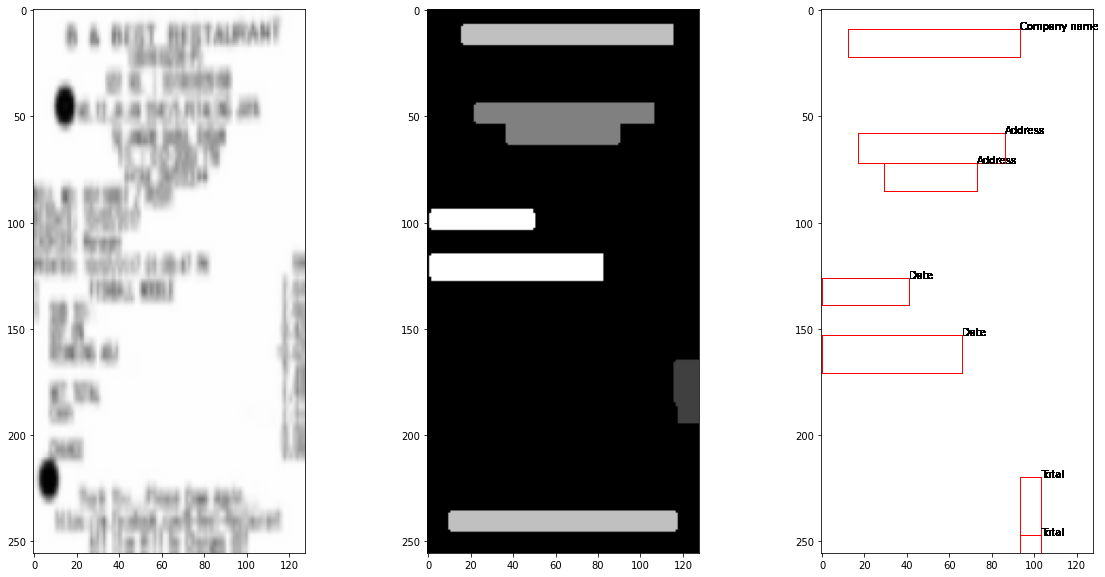

In [121]:
class_mapping = {
                0 : 'Total', 
                1 : 'Address', 
                2 : 'Company name', 
                3 : 'Date'
} 
index = random.randint(0,6)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(input_image_final, cmap='gray')
ax[1].imshow(np.apply_along_axis(np.argmax, axis=2, arr=gt_1h), cmap='gray')
white = np.zeros([gt_1h.shape[0], gt_1h.shape[1],3],dtype=np.uint8)
white.fill(255)
ax[2].imshow(white)
for i in range(0, np_bbox_anchor_coord.shape[0]):
  for j in range(0, np_bbox_anchor_coord.shape[1]):
    if (np.sum(np_bbox_anchor_coord[i][j])==0):
      continue
    #print(np_bbox_anchor_coord[i][j])
    for k in range(0, 4):
      #print(np.sum(np_bbox_anchor_coord[i][j][k:k+4]))
      if (np.sum(np_bbox_anchor_coord[i][j][4*k:4*k+3]) == 0.0):
        continue
      left = round(np_bbox_anchor_coord[i][j][4*k] * target_width)
      top = round(np_bbox_anchor_coord[i][j][4*k+1] * target_height)
      right = round(np_bbox_anchor_coord[i][j][4*k+2] * target_width)
      bottom = round(np_bbox_anchor_coord[i][j][4*k+3] * target_height)
      rect1 = patches.Rectangle((left, top),
                        (right - left),
                        (bottom - top),
                        linewidth=1,edgecolor='r',facecolor='none')
      ax[2].add_patch(rect1)
      ax[2].text(left + (right - left),top,class_mapping[k]) 
plt.show()


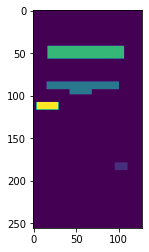

In [167]:
plt.imshow(np.apply_along_axis(np.argmax, axis=2, arr=np_bbox_anchor_coord))

# Class Mapping

- 0 : Other
- 1 : Total 
- 2 : Address 
- 3 : Company name 
- 4 : Date 